## Simple Weather analysis

Checks the amount of wind in one location



In [163]:
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


mpl.rc('axes', labelsize=5)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [164]:
#It replaces the decimal separator from . to , and returns a float field
def convertTofloatField(field):
    field = field.astype(str)
    field = [x.replace(',', '.') for x in field]
    field = pd.to_numeric(field, errors='coerce')
    return field

#Converts from Ms to Knots
def convertMsToKnots(value):
    return value*1.944

In [165]:
data = pd.read_json("Buitrago.json")

In [166]:
data.head(10)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,presMax,horaPresMax,presMin,horaPresMin
0,2016-01-01,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"5,2","0,0","3,0",22:50,"7,3",19:00,29.0,"1,1","10,0",19:40,"900,4",00,"892,4",18
1,2016-01-02,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"2,5","0,1","-2,3",21:30,"7,3",12:40,25.0,"1,9","9,7",14:40,"900,3",19,"894,5",01
2,2016-01-03,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"3,7","0,1","-1,9",01:00,"9,3",23:59,6.0,"1,7","6,1",23:40,"898,7",00,"884,6",24
3,2016-01-04,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"8,6","0,1","3,2",19:00,"14,0",13:40,25.0,"1,9","15,0",14:00,"885,2",03,"877,6",14
4,2016-01-05,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"2,6","0,0","0,0",23:50,"5,1",01:40,29.0,"1,7","13,1",05:00,"889,9",24,"882,3",00
5,2016-01-06,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"4,4","0,0","0,0",00:40,"8,8",23:59,28.0,"3,1","13,6",00:40,"894,1",10,"889,2",21
6,2016-01-07,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"10,6","0,0","8,3",23:50,"13,0",14:50,25.0,"3,1","10,6",09:10,"893,9",10,"889,2",02
7,2016-01-08,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"7,5","0,0","5,8",23:59,"9,2",01:10,15.0,"2,2","9,4",09:50,"892,7",00,"885,6",20
8,2016-01-09,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"7,0","0,0","4,4",04:00,"9,7",14:00,24.0,"2,2","10,0",13:50,"888,0",11,"884,2",04
9,2016-01-10,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,"8,4","0,0","5,3",02:00,"11,6",13:40,19.0,"2,8","15,3",22:30,"887,2",08,"880,1",24


In [167]:
data['velmedia'] = convertTofloatField(data["velmedia"])
data['racha'] = convertTofloatField(data["racha"])

In [168]:
data["velmediaKnots"] = convertMsToKnots(data["velmedia"]) 
data["racha"] = convertMsToKnots(data["racha"])

In [169]:
#Index using "fecha" field
data["fecha"] = pd.to_datetime(data["fecha"])
data = data.set_index("fecha")

In [170]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2016-01-01 to 2019-12-30
Data columns (total 19 columns):
indicativo       1305 non-null object
nombre           1305 non-null object
provincia        1305 non-null object
altitud          1305 non-null int64
tmed             1089 non-null object
prec             1200 non-null object
tmin             1089 non-null object
horatmin         1087 non-null object
tmax             1089 non-null object
horatmax         1089 non-null object
dir              1209 non-null float64
velmedia         1299 non-null float64
racha            1209 non-null float64
horaracha        1209 non-null object
presMax          1060 non-null object
horaPresMax      1060 non-null object
presMin          1060 non-null object
horaPresMin      1060 non-null object
velmediaKnots    1299 non-null float64
dtypes: float64(4), int64(1), object(14)
memory usage: 203.9+ KB


In [171]:
data['Year'] = data.index.year
data['Month'] = data.index.month

In [181]:
#remove not numbers
data = data.dropna(subset=["velmediaKnots"])
data[data['velmediaKnots'].isnull()]

,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,...,velmedia,racha,horaracha,presMax,horaPresMax,presMin,horaPresMin,velmediaKnots,Year,Month
fecha,,,,,,,,,,,,,,,,,,,,,


Text(0, 0.5, 'Knots')

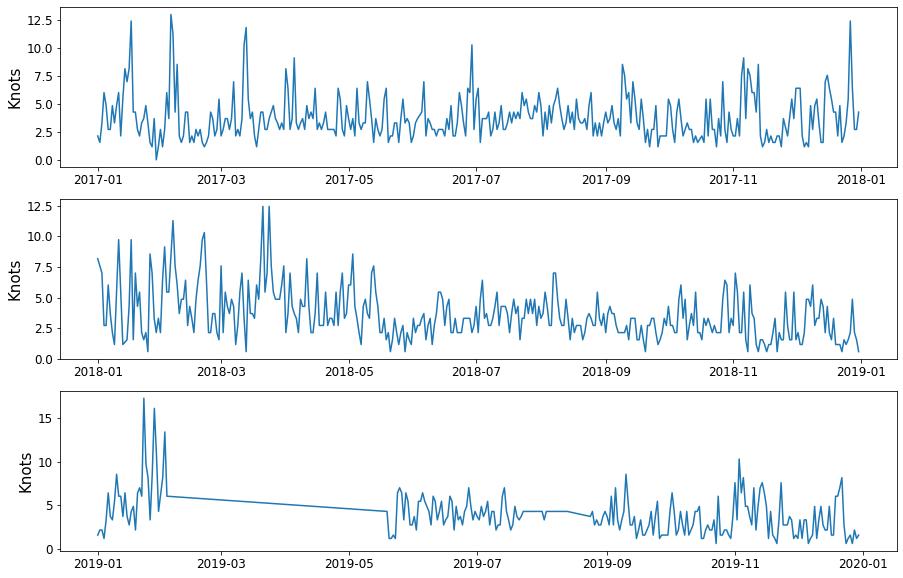

In [183]:
plt.subplots(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.plot(data.loc["2017","velmediaKnots"])
plt.ylabel('Knots', fontsize=15)
plt.subplot(3, 1, 2)
plt.plot(data.loc["2018","velmediaKnots"])
plt.ylabel('Knots', fontsize=15)
plt.subplot(3, 1, 3)
plt.plot(data.loc["2019","velmediaKnots"])
plt.ylabel('Knots', fontsize=15)

In [184]:
data.loc["2017","velmediaKnots"].describe()

count    360.000000
mean       3.787020
std        2.012168
min        0.000000
25%        2.138400
50%        3.304800
75%        4.860000
max       13.024800
Name: velmediaKnots, dtype: float64

In [57]:
data["velmediaKnots"].describe()


count    1299.000000
mean        3.746428
std         2.144417
min         0.000000
25%         2.138400
50%         3.304800
75%         4.860000
max        17.301600
Name: velmediaKnots, dtype: float64

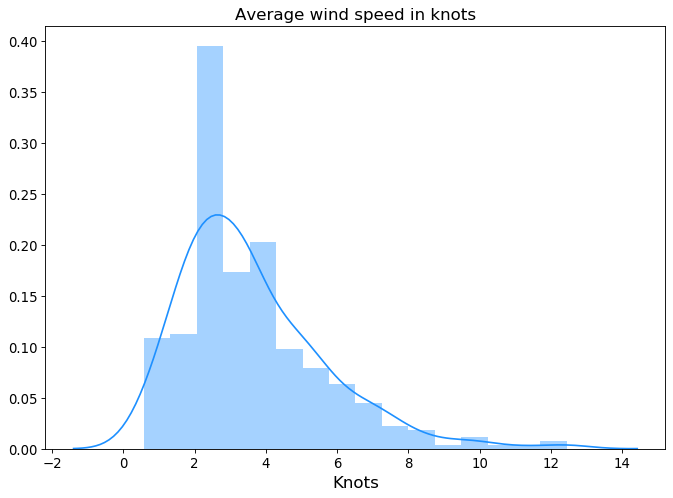

In [185]:
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.title('Average wind speed in knots', fontsize=15)
plt.xlabel('Knots', fontsize=15)
sns.distplot(data.loc["2018","velmediaKnots"], axlabel = "Knots", color="dodgerblue", label="asf")


In [186]:
data.loc[(data['velmediaKnots'] > 4) & (data['velmediaKnots'] < 8)  &  (data['Year']==2018), 'velmediaKnots']


fecha
2018-01-03    6.9984
2018-01-06    6.0264
2018-01-16    4.2768
2018-01-19    6.9984
2018-01-20    4.2768
               ...  
2018-12-09    6.0264
2018-12-13    4.8600
2018-12-14    4.2768
2018-12-16    4.2768
2018-12-28    4.8600
Name: velmediaKnots, Length: 108, dtype: float64

In [176]:
data["2018"].head(10)

,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,...,velmedia,racha,horaracha,presMax,horaPresMax,presMin,horaPresMin,velmediaKnots,Year,Month
fecha,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"0,0",NaN,NaN,NaN,NaN,...,4.2,37.3248,19:10,"915,0",10,"911,6",17,8.1648,2018,1
2018-01-02,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"0,0",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1
2018-01-03,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"0,0",NaN,NaN,NaN,NaN,...,3.6,23.1336,18:30,NaN,NaN,NaN,NaN,6.9984,2018,1
2018-01-04,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"0,0",NaN,NaN,NaN,NaN,...,1.4,NaN,NaN,NaN,NaN,NaN,NaN,2.7216,2018,1
2018-01-05,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"11,0",NaN,NaN,NaN,NaN,...,1.4,13.0248,12:20,NaN,NaN,NaN,NaN,2.7216,2018,1
2018-01-06,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"7,5",NaN,NaN,NaN,NaN,...,3.1,20.6064,18:10,NaN,NaN,NaN,NaN,6.0264,2018,1
2018-01-07,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"1,3",NaN,NaN,NaN,NaN,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,3.6936,2018,1
2018-01-08,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"0,0",NaN,NaN,NaN,NaN,...,1.1,NaN,NaN,NaN,NaN,NaN,NaN,2.1384,2018,1
2018-01-09,3110C,BUITRAGO DEL LOZOYA,MADRID,1030,NaN,"1,0",NaN,NaN,NaN,NaN,...,0.6,6.0264,13:20,NaN,NaN,NaN,NaN,1.1664,2018,1
